<font size="2"> [github.com/jankoslavic/pypinm](http://github.com/jankoslavic/pypinm)</font>

<center>
<img width=300 src="./fig/ladisk.png">
<br>
<font size="7" color="f00e0e" face="garamond"><b>Moduli, numpy, matplotlib</b></font>
<br><br>
<font size="4">
[izr. prof. dr. Janko Slavič](http://www.ladisk.si/~slavic)
</font>
<br><br>
<font size="2">Oktober 2017</font>
</center>

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Moduli-(nadaljevanje)" data-toc-modified-id="Moduli-(nadaljevanje)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Moduli (nadaljevanje)</a></div><div class="lev2 toc-item"><a href="#Upravljalnik-paketov-conda" data-toc-modified-id="Upravljalnik-paketov-conda-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Upravljalnik paketov <code>conda</code></a></div><div class="lev2 toc-item"><a href="#Upravljalnik-paketov-pip" data-toc-modified-id="Upravljalnik-paketov-pip-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Upravljalnik paketov <code>pip</code></a></div><div class="lev1 toc-item"><a href="#Modul-numpy" data-toc-modified-id="Modul-numpy-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modul <code>numpy</code></a></div><div class="lev2 toc-item"><a href="#Osnove-numpy" data-toc-modified-id="Osnove-numpy-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Osnove <code>numpy</code></a></div><div class="lev2 toc-item"><a href="#Osnove-matričnega-računanja" data-toc-modified-id="Osnove-matričnega-računanja-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Osnove matričnega računanja</a></div><div class="lev2 toc-item"><a href="#Vektorizacija-algoritmov" data-toc-modified-id="Vektorizacija-algoritmov-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Vektorizacija algoritmov</a></div><div class="lev1 toc-item"><a href="#Modul-matplotlib" data-toc-modified-id="Modul-matplotlib-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modul <code>matplotlib</code></a></div><div class="lev2 toc-item"><a href="#Osnovna-uporaba" data-toc-modified-id="Osnovna-uporaba-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Osnovna uporaba</a></div><div class="lev2 toc-item"><a href="#Interaktivna-uporaba" data-toc-modified-id="Interaktivna-uporaba-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Interaktivna uporaba</a></div><div class="lev2 toc-item"><a href="#Napredna-uporaba" data-toc-modified-id="Napredna-uporaba-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Napredna uporaba</a></div><div class="lev2 toc-item"><a href="#Uporaba-primerov-iz-matplotlib.org" data-toc-modified-id="Uporaba-primerov-iz-matplotlib.org-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Uporaba primerov iz <code>matplotlib.org</code></a></div><div class="lev1 toc-item"><a href="#Nekaj-vprašanj-za-razmislek!" data-toc-modified-id="Nekaj-vprašanj-za-razmislek!-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Nekaj vprašanj za razmislek!</a></div><div class="lev1 toc-item"><a href="#Dodatno" data-toc-modified-id="Dodatno-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dodatno</a></div><div class="lev2 toc-item"><a href="#numba" data-toc-modified-id="numba-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span><code>numba</code></a></div><div class="lev2 toc-item"><a href="#matplotlib:-animacije,-povratni-klic,-XKCD-stil" data-toc-modified-id="matplotlib:-animacije,-povratni-klic,-XKCD-stil-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span><code>matplotlib</code>: animacije, povratni klic, XKCD stil</a></div><div class="lev2 toc-item"><a href="#Za-najbolj-zagrete" data-toc-modified-id="Za-najbolj-zagrete-53"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Za najbolj zagrete</a></div>

# Moduli (nadaljevanje)

Poleg vgrajenih modulov, in tistih, ki jih pripravimo sami, obstaja še velika množica modulov, ki jih lahko najdemo na spletu in Pythonu dodajajo nove funkcionalnosti. Šele ti moduli naredijo ekosistem Pythona tako uporaben.

[Anaconda](https://www.anaconda.com/download/) je najbolj popularna distribucija Pythona in ima vključenih že veliko modulov (za podroben seznam glejte to [povezavo](https://docs.anaconda.com/anaconda/packages/pkg-docs)); predvsem pa ima vključene vse bistvene. Najbolj pomembne na področju inženirskih ved bomo spoznali v okviru te knjige.

Modul je tehnično gledano ena datoteka, kadar nek večji modul vsebuje več modulov, pa lahko začnemo govoriti o *paketih*. 

Module oz pakete lahko *posodabljamo* ali nameščamo *nove*, pri tem nam pomagajo t.i. *upravljalniki paketov* (ang. *package manager*). Najbolj pogosto uporabljamo:
* `pip`: [dokumentacija](https://pip.pypa.io/en/stable/),
* `conda`: [dokumentacija](https://conda.io/docs/).

Upravljalnika paketov nista povsem ekvivalentna, pogosto uporabo si bomo pogledali spodaj.

## Upravljalnik paketov `conda`
`conda` uporabljamo predvsem za module / pakete vključene v distribucijo *Anaconda* in ima še nekatere dodatne sposobnosti (npr. kreiranja navideznega okolja, ang. *virtual environment*).

Če želimo posodobiti vse nameščene pakete znotraj distribucije Anaconda, najprej posodobimo samo `conda`, nato pa pakete. V ukazni vrstici izvedemo sledeča ukaza:
```
conda update conda
conda update --all
```

Kateri paketi so nameščeni preverimo z ukazom (v ukazni vrstici):
```
conda list
```

Namesto izhoda v ukazno vrstico, bomo tukaj večkrat uporabljali možnost *Jupyter notebooka*, ko s pomočjo klicaja (!) v celici s kodo izvedemo ukaz v ukazni vrstici  (gre za kratko obliko magičnega ukaza `%se` - shell execute, glejte [dokumentacijo](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-sx)). Opomba: dva klicaja bi vrnila celoten rezultat neposredno v notebook (ker je izpis zelo dolg, smo se temu tukaj izognili)

Poglejmo primer:

In [1]:
rezultat = !conda list
rezultat[:5]

['# packages in environment at c:\\Users\\Janko\\Anaconda3:',
 '#',
 '_ipyw_jlab_nb_ext_conf    0.1.0            py36he6757f0_0  ',
 'alabaster                 0.7.10           py36hcd07829_0  ',
 'anaconda                  5.0.0            py36hea9b2fc_0  ']

Pakete namestimo z ukazom (v ukazni vrstici):
```
conda install [ime paketa]
```
in odstranimo z:
```
conda remove [ime paketa]
```
Za več glejte [dokumentacijo](https://conda.io/docs/user-guide/getting-started.html).

## Upravljalnik paketov `pip`

`pip` je upravljalnik paketov z daljšo zgodovino kot `conda`; podpira bistveno več paketov ([pypi.python.org/pypi](https://pypi.python.org/pypi)), vendar ni tako odporen na nezdružljivosti kakor `conda`. Razlik je še več, vendar tukaj ne bomo šli v podrobnosti; uporabljate tistega, ki vam namesti željeni paket!

Podobno kot pri `conda`, tudi tukaj že nameščene pakete najdemo z ukazom v ukazni vrstici ([dokumentacija](https://pip.pypa.io/en/stable/reference/pip_list/)):
```
pip list
```

Pakete s `pip` namestimo z:
```
pip install [ime_paketa]
```
posodobimo z:
```
pip install [ime_paketa] --upgrade
```
in odstranimo z:
```
pip uninstall [ime_paketa]
```

### Primer namestitve paketa

Sicer pa pakete najpogosteje najdemo na spletu ([pypi.python.org](https://pypi.python.org/pypi)). Pojdite na omenjeni portal in poišite pakete na temo snemanja posnetkov iz portala [www.youtube.com](https://www.youtube.com).  Z iskanjem "youtube download" najdemo obetaven paket `youtube_dl`, ki ga namestimo:

In [2]:
!!pip install "youtube_dl" --upgrade

['Requirement already up-to-date: youtube_dl in c:\\users\\janko\\anaconda3\\lib\\site-packages']

Sedaj modul uporabimo (za podrobnosi uporabe glejte [dokumentacijo](http://rg3.github.io/youtube-dl/)). Najprej uvozimo celotni paket:

In [3]:
import youtube_dl
yt = youtube_dl.YoutubeDL() # kreiramo instanco objekta (kaj to točno pomeni, spoznamo pozneje)

In prenesemo poljubni video:

In [4]:
yt.download(url_list = ['7VGiJN-sCKk'])

[youtube] 7VGiJN-sCKk: Downloading webpage
[youtube] 7VGiJN-sCKk: Downloading video info webpage
[youtube] 7VGiJN-sCKk: Extracting video information
[youtube] 7VGiJN-sCKk: Downloading MPD manifest
[download] HOZENTREGARJI- JUTR TOČIMO ZASTONJ-7VGiJN-sCKk.mp4 has already been downloaded
[download] 100% of 8.14MiB


0

# Modul ``numpy``

Kakor je omenjeno zgoraj, so v okviru *Anaconda* distribucije Pythona že nameščeni praktično vsi pomembni moduli. V kolikor bi namestili Python *the hard way*, bi sicer morali modul ``numpy`` namestiti posebej (glejte [spletno stran `numpy`](http://www.numpy.org)).

## Osnove `numpy`

Najprej uvozimo modul (uveljavljeno je, da ga uvozimo v kratki obliki `np`):

In [5]:
import numpy as np

Gre za enega najbolj pomembnih modulov. Na kratko: gre za visoko optimiran modul za numerične izračune!

Poglejmo si najprej sintakso za vektor ničel ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html)):
```python
numpy.zeros(shape, dtype=float, order='C')
```
argumenti so:
* `shape` definira obliko (lahko večdimenzijsko numerično polje),
* `dtype` definira tip podatka,
* `order` definira vrstni red (lahko je C ali F kot Fortran).

Poglejmo primer:

In [6]:
np.zeros(3)

array([ 0.,  0.,  0.])

Ali pa:

In [7]:
np.zeros((3,5))

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

Podobno kot `zeros` se obnaša `ones`, vendar je namesto ničel vrednost 1 ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html#numpy.ones)). 

Poglejmo si primer, kjer definiramo tudi tip `int` (privzeti tip je `float`):

In [8]:
np.ones(4, dtype=int)

array([1, 1, 1, 1])

Pogosto bomo tudi uporabljali razpon vrednosti `arange` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)):
```python
numpy.arange([start, ]stop, [step, ]dtype=None)
```
kjer so argumenti:
* `start` začetna vrednost razpona (privzeto 0),
* `stop` končna vrednost razpona,
* `step` korak in 
* `dtype` tip vrednosti (če tip ni podan, se vzame tip ostalih argumetnov, npr. `step`).

Pogljemo primer razpona od 0 do 9 (kakor vedno pri Pythonu *od* je vključen, *do* pa ni):

In [9]:
np.arange(9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

Ali pa od 7 do 12 po koraku 2, vendar število s plavajočo vejico:

In [10]:
np.arange(7, 12, 2, dtype=float)

array([  7.,   9.,  11.])

Še eno funkcijo bomo pogosto uporabili, to je `linspace` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)):
```python
numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
```
ki definiranemu razponu vrne numerično polje vrednosti na enaki razdalji (ekvidistanten razmik).

Argumenti so:
* `start` začetna vrednost razpona,
* `stop` končna vrednost razpona,
* `num` število točk/vozlišč, 
* `endpoint` ali je vrednost pri `stop` vključena ali ne,
* `retstep` v primeru `True` vrne funkcija terko `(rezultat, korak)`
* `dtype` tip vrednosti (če tip ni podan, se vzame tip ostalih argumetnov, npr. `step`).

Primer generiranja 10 točk na razponu od $-\pi$ do vključno $+\pi$:

In [11]:
np.linspace(-np.pi, np.pi, 10)

array([-3.14159265, -2.44346095, -1.74532925, -1.04719755, -0.34906585,
        0.34906585,  1.04719755,  1.74532925,  2.44346095,  3.14159265])

Mimogrede smo zgoraj spoznali, da ima `numpy` vgrajene konstante (npr. $\pi$): 

Poglejmo še vgrajene funkcije za generiranje naključnih števil. Te najdemo v `numpy.random` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/routines.random.html)). 

Najprej si poglejmo funkcijo `numpy.random.seed()`, ki se uporablja za ponastavitev generatorja naključnih števil ([dokumetnacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html#numpy.random.seed)). To pomeni, da lahko z istim semenom (ang. *seed*) različni uporabniki generiramo ista naključna števila!

Spodnja vrstica:

In [12]:
np.random.seed(0)

Bo imela za posledico, da bo klic generatorja naključnih števil z enakomerno porazdelitvijo `numpy.random.rand()` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html#numpy.random.rand)) vedno rezultiral v iste vrednosti:

In [13]:
np.random.rand(3)

array([ 0.5488135 ,  0.71518937,  0.60276338])

Preizkusimo ali je res kar smo zapisali in ponastavimo seme in kličimo generator:

In [14]:
np.random.seed(0)
np.random.random(3)

array([ 0.5488135 ,  0.71518937,  0.60276338])

### Zapis matrik in vektorjev

Matrika je dimenzije ``m x n``, kjer je na prvem mestu ``m`` število vrstic in ``n`` število stolpcev. Primer definiranja matrike dimenzije `m x n = 3 x 2` je: 

In [15]:
a = np.zeros((3, 2))
a

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

Vektor je lahko zapisan kot **vrstični vektor**:

In [16]:
b = np.zeros(3) # (1 x 3)
b

array([ 0.,  0.,  0.])

ali kot **stolpični vektor**:

In [17]:
c = np.zeros((3, 1)) # 3 x 1
c

array([[ 0.],
       [ 0.],
       [ 0.]])

V modulu ``numpy`` lahko vektorje in matrike zapisujete kot:
* `numpy.array` (priporočeno, [dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)),
* `numpy.matrix` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html)). 

Priporočena je prva oblika (`numpy.array`), ki pa ne sledi povsem matematičnemu zapisu (več o tem pozneje), nam pa omogoča **enostavnejše** programiranje in je tudi numerično **bolj učinkovit** pristop ([vir](http://wiki.scipy.org/NumPy_for_Matlab_Users#head-e9a492daa18afcd86e84e07cd2824a9b1b651935)). Pristop `numpy.matrix` tukaj ne bomo obravnavali.

V angleškem jeziku bomo *array* prevajali kot **večdimenzijsko numerično polje** ali včasih **večdimenzijske sezname** (ker imajo nekatere podobnosti z navadnimi seznami). Nekatere knjige *array* tukaj prevajajo kot *tabela*.

### Rezanje

**Rezanje** (ang. *slicing*) seznamov smo si sicer že pogledali v poglavju Uvod v Python. Podobno rezanje, vendar bolj splošno, velja tudi za numerična polja modula `numpy`. 

Sintaksa rezanja ([dokumentacija](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html)) je:
```python
numpy_array[od:do:korak]
```
pri tem velja:
* indeksiranje se začne z 0 (kot sicer pri Pythonu),
* **`od`** pomeni **>=**,
* **`do`** pomeni **<**),
* `od`, `do`, `korak` so opcijski parametri,
* če parameter `od` ni podan pomeni od *začetka*,
* če parameter `do` ni podan pomeni do vključno zadnjega,
* če parameter `korak` ni podan, pomeni korak 1.

Primer od elementa 3, do elementa 8 po koraku 2:

In [18]:
b = np.arange(10)
b[3:8:2]

array([3, 5, 7])

Primer od elementa 3 naprej:

In [19]:
b[3:]

array([3, 4, 5, 6, 7, 8, 9])

Primer od elementa 3 naprej, vendar vsak tretji:

In [20]:
b[3::3]

array([3, 6, 9])

Primer zadnjih 5 elementov, vendar vsak drugi:

In [21]:
b[-5::2]

array([5, 7, 9])

Primer zadnjih 5 elementov brez zadnjih 2, vendar vsak drugi:

In [22]:
b[-5:-2:2]

array([5, 7])

#### Poglejmo si še rezanje večdimenzijskega numeričnega polja. 

Večdimenzijsko rezanje izvedemo tako, da dimenzije ločimo z vejico:
```python
numpy_array[rezanje0, rezanje1,...]
```
kjer `rezanje0` reže indeks 0 (prvo dimenzijo) v obliki `od:do:korak`, `rezanje1` reže indeks 1 (drugo dimenzijo) in tako naprej.

Poglejmo si primer; najprej pripravimo seznam 15 števil (`np.arange`), nato z metodo `reshape()` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)) spremenimo obliko v matriko `3 x 5`:

In [23]:
a = np.arange(15)
a = a.reshape((3,5))
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

Obliko numeričnega polja lahko preverimo z atributom `shape` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html))

In [24]:
a.shape

(3, 5)

Atribute bomo sicer podrobno spoznali pri obravnavi razredov.

Prikažimo vrstice z indeksom 0:

In [25]:
a[0]

array([0, 1, 2, 3, 4])

Isti rezultat bi dobili z prikazom vrstice z indeksom 0 in vseh stolpcev:

In [26]:
a[0,:]

array([0, 1, 2, 3, 4])

Pogosto želimo dostopati do stoplcev, npr. stolpca z indeksom 1 (torej režemo vse vrstice in stolpec z indeksom 1):

In [27]:
a[:,1]

array([ 1,  6, 11])

Poglejmo si še primer rezanja prvih dveh stolpcev in zadnjih dveh vrstic:

In [28]:
a[:2, -2:]

array([[3, 4],
       [8, 9]])

Podobna logika se uporabi pri dimenzijah višjih od 2.

### Operacije nad numeričnimi polji

Poglejmo si sedaj bolj podrobno nekatere osnovne prednosti numeričnega polja `numpy.array` v primerjavi z navadnim Python seznamom.

Najprej pripravimo navaden Python seznam:

In [29]:
a = [1, 2, 3, 4, 5, 6, 7]
a

[1, 2, 3, 4, 5, 6, 7]

In nato še numerično polje `numpy.array` (kar iz seznama `a`):

In [30]:
b = np.array(a)
b

array([1, 2, 3, 4, 5, 6, 7])

Ko izpišemo `b`, smo opozorjeni, da gre za `array([...])`.

Pogljemo sedaj kako se obnaša Python seznam pri množenju:

In [31]:
2*a

[1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7]

Opazimo, da se podvoji seznam, ne pa vrednosti, kar bi morebiti pričakovali.

Poglejmo kako se pri množenju obnaša numerično polje `numpy.array`:

In [32]:
2*b

array([ 2,  4,  6,  8, 10, 12, 14])

Opazimo, da se podvojijo vrednosti; tako kakor bi pričakovali, ko množimo na primer skalarno vrednost in vektor!

### Aritmetične operacije

Izbor aritmetičnih operacij, ki jih ``numpy`` izvajana nivoju posameznega elementa je (po naraščajoči prioriteti):
1. `x + y` vsota,	 	 
* `x - y` razlika,	 	 
* `x * y` produkt,	 	 
* `x / y` deljenje,	 	 
* `x // y` celoštevilsko deljenje (rezultat je celo število zaokroženo navzdol),
* `x % y` ostanek pri celoštevilskem deljenju,	 
* `x ** y`	vrne `x` na potenco `y`.

Primer:

In [33]:
b + 3*b - b**2

array([  3,   4,   3,   0,  -5, -12, -21])

Vse aritmetične operacijo so sicer navedene v [dokumentaciji](https://docs.scipy.org/doc/numpy/reference/routines.math.html#arithmetic-operations) in namesto kratkih oblik imamo tudi *dolge*, npr: `numpy.power(x, y)` namesto `x**y`; primer:

In [34]:
np.power(b, 2)

array([ 1,  4,  9, 16, 25, 36, 49], dtype=int32)

Mimogrede opazimo, da je rezultat tipa `int32` (integer). Ko smo ustvarili ime `b`, smo namreč ustvarili numerino polje z elementi tipa `int32`.

### Matematične funkcije

`numpy` ponuja praktično vse potrebne matematične (in druge) operacije, navedimo jih po skupinah kot so strukturirane v [dokumentaciji](https://docs.scipy.org/doc/numpy/reference/routines.math.html#mathematical-functions):
* [trigonometrične funkcije](https://docs.scipy.org/doc/numpy/reference/routines.math.html#trigonometric-functions),
* [hiperbolične](https://docs.scipy.org/doc/numpy/reference/routines.math.html#hyperbolic-functions),
* [funkcije za zaokroževanje](https://docs.scipy.org/doc/numpy/reference/routines.math.html#rounding),
* [funkcije za vsoto, produkt in odvod](https://docs.scipy.org/doc/numpy/reference/routines.math.html#sums-products-differences),
* [eksponenti in logaritmi](https://docs.scipy.org/doc/numpy/reference/routines.math.html#exponents-and-logarithms),
* [posebne](https://docs.scipy.org/doc/numpy/reference/routines.math.html#other-special-functions) ter [preostale](https://docs.scipy.org/doc/numpy/reference/routines.math.html#miscellaneous) funkcije

Poglejmo primer funkcije $\sin()$:

In [35]:
a = np.linspace(0, 2*np.pi, 5)
np.sin(a)

array([  0.00000000e+00,   1.00000000e+00,   1.22464680e-16,
        -1.00000000e+00,  -2.44929360e-16])

Poglejmo še hitrost izvajanja:

In [36]:
%timeit -n100 np.sin(a)

674 ns ± 46.2 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Podatkovni tipi

``numpy`` ima vnaprej definirane podatkovne tipe (statično). Celoten seznam možnih tipov je naveden v [dokumentaciji](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

Tukaj se bomo osredotočili predvsem na sledeče tipe:
* ``int`` - celo število (poljubno veliko)
* ``float`` - število s plavajočo vejico ([dokumentacija](https://docs.python.org/dev/library/functions.html#float))
* ``complex`` - kompleksno število s plavajočo vejico
* ``object`` - python objekt.

Poglejmo si nekaj primerov (cela števila, število s plavajočo vejico in kompleksna števila):

In [37]:
np.arange(5, dtype=int)

array([0, 1, 2, 3, 4])

In [38]:
np.arange(5, dtype=float)

array([ 0.,  1.,  2.,  3.,  4.])

In [39]:
np.arange(5, dtype=complex)

array([ 0.+0.j,  1.+0.j,  2.+0.j,  3.+0.j,  4.+0.j])

### Spreminjanje elementov numeričnega polja (`numpy.array`)

Podatke spreminjamo na podoben način kakor pri navadnih seznamih; v kolikor uporabljamo rezanje, moramo paziti, da so na levi in desni streni enačaja podatki iste oblike (`array.shape`).

Poglejmo si primer, ko matriki ničel dimenzije `3 x 4` spremenimo element z indeksom `[2, 3]`:

In [40]:
a = np.zeros((3, 4))
a[2, 3] = 100
a

array([[   0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,  100.]])

Sedaj spremenimo še elemente prvih dveh vrstic in prvih dveh stolpcev v vrednost 1:

In [41]:
a[:2, :2] = np.ones((2, 2))
a

array([[   1.,    1.,    0.,    0.],
       [   1.,    1.,    0.,    0.],
       [   0.,    0.,    0.,  100.]])

Pomnožimo z 2 stolpec z indeksom 1:

In [42]:
a[:,1] = 2 * a[:,1]
a

array([[   1.,    2.,    0.,    0.],
       [   1.,    2.,    0.,    0.],
       [   0.,    0.,    0.,  100.]])

Bodite pozorni na to, da na tak način naredimo *pogled* (view) na podatke (**ne naredimo kopije podatkov**). 

Za primer, najprej naredimo novo ime `pogled`:

In [43]:
pogled = a[:, 2]
pogled

array([ 0.,  0.,  0.])

Sedaj spremenimo izbrane vrednosti numeričnega polja `a`:

In [44]:
a[:, 2] = 5
a

array([[   1.,    2.,    5.,    0.],
       [   1.,    2.,    5.,    0.],
       [   0.,    0.,    5.,  100.]])

Vrednosti `pogled` nismo spreminjali. Ker pa ime kaže na isto mesto kakor `a[:, 2]` so vrednosti spremenjene:

In [45]:
pogled

array([ 5.,  5.,  5.])

Če želimo kopijo, potem moramo narediti tako:

In [46]:
kopija = a[:, 2].copy()
kopija

array([ 5.,  5.,  5.])

In rezultat `kopija` ostane nespremenjen:

In [47]:
a[:, 2] = 2
kopija

array([ 5.,  5.,  5.])

## Osnove matričnega računanja

Če želite ponoviti matematične osnove matričnega računanja, potem sledite tej [povezavi](http://www.fmf.uni-lj.si/~kosir/poucevanje/skripta/matrike.pdf) (gre za kratek in dober pregled prof. dr. T. Koširja). Tukaj si bomo pogledali kako matrične račune izvedemo s pomočjo paketa `numpy`.

Najprej definirajmo matriki $\mathbf{A}$ in $\mathbf{B}$:

In [48]:
A = np.array([[1, 2], [3, 2]])
B = np.array([[1, 1], [2, 2]])

Ter vektorja $\mathbf{x}$ in $\mathbf{y}$.

In [49]:
x = np.array([1, 2])
y = np.array([3, 4])

Skalarni produkt dveh vektorjev izvedemo s funkcijo `dot()` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)):
```python
numpy.dot(a, b, out=None)
```
kjer argumenta `a` in `b` predstavljata numerični polji `numpy.array` (poljubne dimenzije), ki jih želimo množiti. Če sta `a` in `b` dimenzije 1 se izvede skalarni produkt. Pri dimenziji 2 (matrike) se izračuna produkt matrik. Za uporabo funkcije `dot()` pri dimenzijah več kot 2: glejte [dokumentacijo](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html).

Poglejmo primer množenja dveh vektorjev, to lahko izvedemo tako:

In [50]:
np.dot(x, y)

11

ali tudi tako:

In [51]:
x.dot(y)

11

Zgoraj smo omenili, da `numpy.array` ne sledi dosledno matematičnemu zapisu. Če bi, bi namreč eden od vektorje moral biti vrstični, drugi stolpični. `numpy` to poenostavi in zato je koda lažje berljiva in krajša.

Poglejmo sedaj množenje matrike z vektorjem (opazimo, da transponiranje `x` ni potrebno):

In [52]:
np.dot(A, x)

array([5, 7])

Lahko pa seveda pripravimo matematično korektno transponirano obliko vektorja (ampak vidimo, da je zapis neroden):

In [53]:
A.dot(np.transpose([x]))

array([[5],
       [7]])

Transponiranje ima sicer tudi kratko obliko, prek atributa `T`, npr. za matriko $\mathbf{A}$:

In [54]:
A.T

array([[1, 3],
       [2, 2]])

Poglejmo si primer množenja dveh matrik:

In [55]:
np.dot(A, B)

array([[5, 5],
       [7, 7]])

Od Pythona 3.5 naprej se za množenje matrik (in vektorjev) uporablja tudi operator `@` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html#numpy.matmul)), ki omogoča kratek in preglede zapis.

Zgornji primeri zapisani z operatorjem `@`:

In [56]:
x @ y

11

In [57]:
A @ x

array([5, 7])

In [58]:
A @ B

array([[5, 5],
       [7, 7]])

**Vektorski produkt** izračunamo s funkcijo `numpy.cross` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cross.html)):
```python
numpy.cross(a, b, axisa=-1, axisb=-1, axisc=-1, axis=None)
```
kjer `a` in `b` definirata komponente vektorjev. Če sta podani samo dve komponenti ($x$ in $y$), se izračuna skalarna vrednost (komponenta $z$); če so podane tri komponente, je rezultat tudi vektor s tremi komponentami. Uporaba funkcije je možna tudi na večdimenzijskih numeričnih poljih in temu so namenjeni preostali argumenti (glejte dokumentacijo).

Primer vektorskega produkta ravninskih vektorjev:

In [59]:
x = np.array([1, 0])
y = np.array([0, 1])
np.cross(x, y)

array(1)

Primer vektorskega produkta prostorskih vektorjev:

In [60]:
x = np.array([1, 0, 0])
y = np.array([0, 1, 0])
np.cross(x, y)

array([0, 0, 1])

### Nekatere funkcije knjižnice ``numpy``

Tukaj si bomo pogledali še nekatere funkcije, ki jih bolj ali manj pogosto potrebujemo.

Enotsko matriko definiramo s funkcijo `numpy.identity()` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.identity.html)):
```python
numpy.identity(n, dtype=None)
```
kjer argument `n` definira število vrstic in stolpcev pravokotne matrike. Tip `dtype` je privzeto `float`.

Primer enotske matrike:

In [61]:
A = np.identity(3)
A

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

Do diagonalnih elementov matrike dostopamo s pomočjo funkcije `numpy.diagonal()` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diagonal.html))
```python
numpy.diagonal(a, offset=0, axis1=0, axis2=1)
```
Če je matrika dvodimenzijska, potem funkcija s privzetimi argumenti vrne diagonalno os. Če je dimenzija višja od 2, se uporabi osi `axis1` in `axis2`, da se izloči dvodimenzijsko polje, nato pa določi diagonalo glede na elemente `[i, i+offset]`.

Poglejmo primer izločanja diagonale:

In [62]:
np.diagonal(A)

array([ 1.,  1.,  1.])

In uporabe `offset=1` za sosednjo diagonalo (najprej pripravimo nesimetirčno matriko):

In [63]:
A[0, 1] = 10
np.diagonal(A, offset=1)

array([ 10.,   0.])

Podobno sintakso kot `numpy.diagonal()`, ima funkcija `numpy.trace()`, ki izračuna vsoto (sled) diagonalnih elementov ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.trace.html)):
```python
numpy.trace(a, offset=0, axis1=0, axis2=1, 
            dtype=None, out=None)
```

Primer sledi diagonale:

In [64]:
np.trace(A)

3.0

In potem sosednje diagonale:

In [65]:
np.trace(A, offset=1)

10.0

Pogosto nas zanima največji ali najmanjši element nekega numeričnega polja. `numpy` je tukaj zelo splošen. Poglejmo si na primeru funkcije `numpy.max()` ([dokumentacija](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.amax.html)):
```python
numpy.max(a, axis=None, out=None)
```
Tukaj izpostavimo argument `axis`, ki pove čez kateri indeks iščemo maksimalno vrednost. Če je `axis=None` se določi največja vrednost v celotnem polju.

Primer izračuna največje vrednosti celotnega polja (prej poglejmo `A`):

In [66]:
A

array([[  1.,  10.,   0.],
       [  0.,   1.,   0.],
       [  0.,   0.,   1.]])

In [67]:
np.max(A)

10.0

In primer izračuna največje vrednosti čez vrstice (torej po stolpcih):

In [68]:
np.max(A, axis=0)

array([  1.,  10.,   1.])

In primer izračuna največje vrednosti čez stolpce (torej po vrsticah):

In [69]:
np.max(A, axis=1)

array([ 10.,   1.,   1.])

Par funkcije `max()` je `numpy.argmax()`, kateri določi indekse največje vrednosti.

Primer uporabe:

In [70]:
np.argmax(A, axis=0)

array([0, 0, 2], dtype=int64)

### Linearna algebra z ``numpy``

Pozneje bomo linearno algebro bolj podrobno spoznali in bomo sami pisali algoritme. Tukaj si pogljemo nekatere osnove, ki so vgrajene v modul `numpy`.

Za primere, najprej definirajmo matriko in vektor:

In [71]:
A = np.array([[4, -2],
              [-2, 4]])
b = np.array([1, 2])

Inverzno matriko izračunamo z uporabo funkcije `numpy.linalg.inv()` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html)):
```python
numpy.linalg.inv(a)
```

In [72]:
np.linalg.inv(A)

array([[ 0.33333333,  0.16666667],
       [ 0.16666667,  0.33333333]])

Sistem linearnih enačb, ki ga definirata matrika koeficientov `a` in vektor konstant `b` rešimo s pomočjo funkcije `numpy.linalg.solve()` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html)):
```python
numpy.linalg.solve(a, b)
```

Primer:

In [73]:
rešitev = np.linalg.solve(A, b)
rešitev

array([ 0.66666667,  0.83333333])

Enakost elementov numeričnega polja `a` in `b` (znotraj določene tolerance) preverimo s funkcijo `numpy.isclose()` ([dokumentacija](https://docs.scipy.org/doc/numpy/reference/generated/numpy.isclose.html)):
```python
numpy.isclose(a, b, rtol=1e-05, atol=1e-08, equal_nan=False)
```

Primer:

In [74]:
np.isclose(np.dot(A, rešitev), b)

array([ True,  True], dtype=bool)

## Vektorizacija algoritmov

Tukaj želimo v posebnem poglavju izpostaviti vektorizacijo algoritmov. Glede na to kako Python in `numpy` delujeta se je potrebno izogibati zankam. Bistveno hitreje lahko izvajamo izračune, če jih uspemo vektorizirati; to pomeni, da izračune izvajamo na nivoju vektorjev (oz. numeričnih polj) in ne elementov.

Za primer si najprej pripravimo podatke (dva vektorja dolžine 1000)

In [75]:
N = 1000
a = np.arange(N)
b = np.arange(N)

Izračunajmo skalarni produkt vektorjev z uporbo zanke `for`:

In [76]:
c = 0
for i in range(N):
    c += a[i] * b[i]
c

332833500

In pomerimo hitrost:

In [77]:
%%timeit -n100
c = 0
for i in range(N):
    c += a[i] * b[i]

507 µs ± 52.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Isti rezultat pridobimo še v vektorski obliki:

In [78]:
%%timeit -n100
c = a @ b

5.52 µs ± 3.02 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Vidimo, da je vektroski način bistveno hitrejši (za še hitrejši način glejte `numba` v dodatku)!

# Modul ``matplotlib``

V Pythonu imamo več možnosti za prikaz rezultatov v grafični obliki. Najbolj uporabni paketi so:
* [`matplotlib`](http://matplotlib.org/) za visoko kakovostne, visoko prilagodljive slike (relativno počasno),
* [`pyqtgraph`](http://www.pyqtgraph.org/) za kakovostne in prilagodljive uporabniške vmesnike (zelo hitro),
* [`bokeh`](https://bokeh.pydata.org/en/latest/) za interaktiven prikaz v brskalniku (relativno hitro).

Obstaja še veliko drugih; dober pregled naredi Jake VanderPlas na konferenci [PyCon 2017](https://www.youtube.com/watch?v=FytuB8nFHPQ) (sicer avtor paketa za deklerativno vizualizacijo: *Altair*)

## Osnovna uporaba

Najbolj razširjen in najbolj splošno uporabljen je paket [`matplotlib`](http://matplotlib.org/):
<img width="400" src="http://matplotlib.org/_static/logo2.svg">

Sposobnosti paketa najbolje prikazuje [galerija](http://matplotlib.org/gallery.html#). Gre za zelo sofisticiran paket in tukaj si bomo na podlagi primerov pogledali nekatere osnove.

Tipično uvozimo `matplotlib.pyplot` kot `plt`:

In [79]:
import matplotlib.pyplot as plt

Znotraj *Jupyter notebooka* obstajata dva načina prikaza slike (v oglatem oklepaju je magic ukaz za proženje):
1. `[%matlotlib inline]   `: slike so vključene v notebook (**medvrstični** način),
3. `[%matlotlib notebook] `: slike so vključene interaktivno v notebook (**medvrstični interaktivni** način).

Opomba: *interaktivni način se v pasivni, spletni/pdf, verziji te knjige ne prikaže pravilno*.

Tukaj bomo najpogosteje uporavljali *medvrstični* način:

In [80]:
%matplotlib inline

Kratek primer:

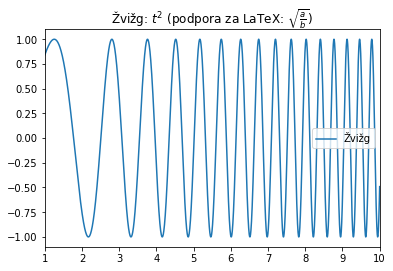

In [81]:
t = np.linspace(1, 130, 44000)
žvižg = np.sin(t**2)
plt.plot(t, žvižg, label='Žvižg')
plt.xlim(1, 10)
plt.title('Žvižg: $t^2$ (podpora za LaTeX: $\\sqrt{\\frac{a}{b}}$)')
plt.legend();

Mimogrede, zakaj to imenujemo žvižg (oz. kvadraten žvižg)? Da dobimo odgovor, podatke predvajamo na zvočnik:

In [82]:
from IPython.display import Audio, display
display(Audio(data=žvižg, rate=44000))

Aktivirajmo sedaj interaktivni način (glejte tudi ``%matplotlib``):

In [83]:
%matplotlib notebook

<IPython.core.display.Javascript object>


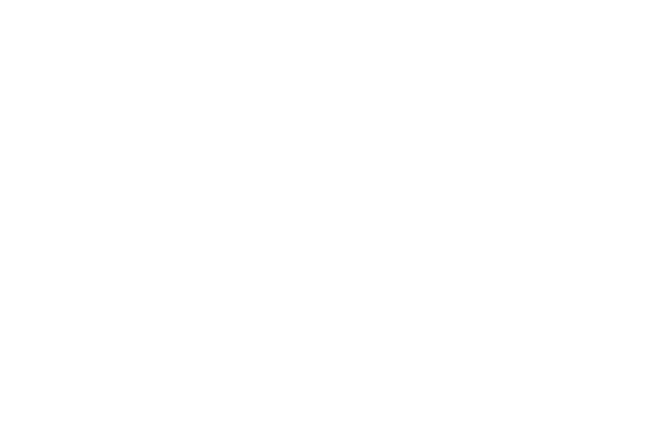

<IPython.core.display.Javascript object>


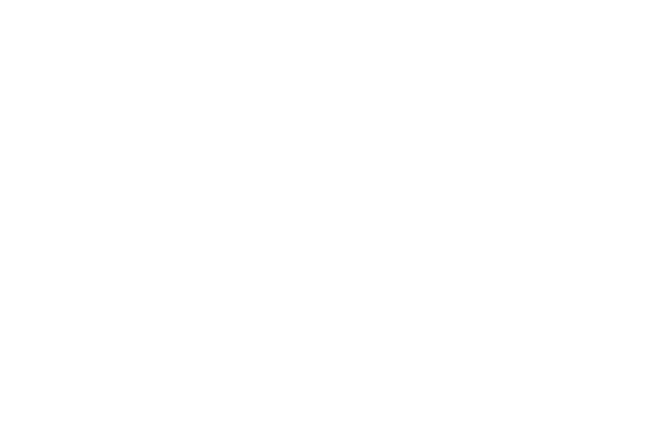

In [84]:
plt.plot([1,2,3], [2,4,5]);

Zgornjo sliko lahko sedaj interaktivno klikamo in tudi dopolnjujemo s kodo:

<IPython.core.display.Javascript object>


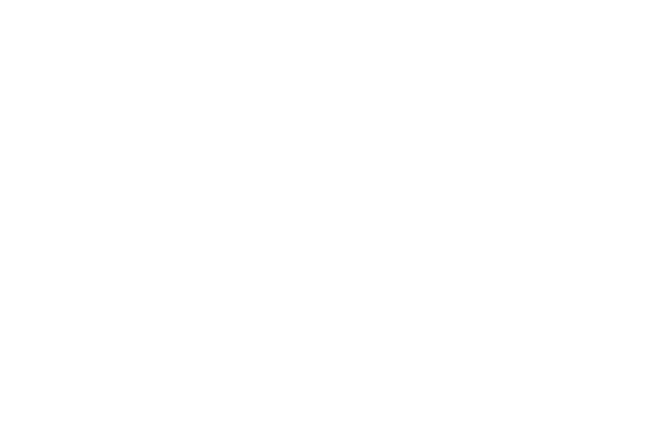

<IPython.core.display.Javascript object>


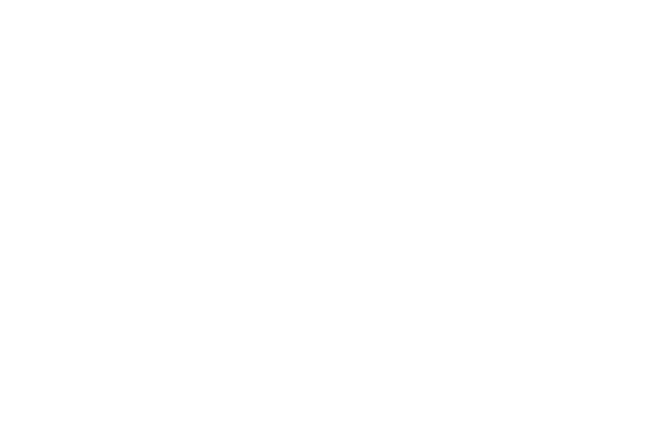

In [85]:
plt.title('Pozneje dodani naslov!')
plt.xlabel('Čas [$t$]');

## Interaktivna uporaba

Pri tem predmetu bomo večkrat uporabljali interaktinivnost pri delu z grafičnimi prikazi. V ta namen najprej uvozimo `interact` iz paketa `ipywidgets`:

In [86]:
from ipywidgets import interact

Potem definiramo sliko kot funkcijo z argumenti `amplituda`, `fr`, `faza` in `dušenje`:

In [87]:
def slika(amplituda=1, fr=10, faza=0, dušenje=0.):
    t = np.linspace(0, 1, 200)
    f = amplituda * np.sin(2*np.pi*fr*t - faza) * np.exp(-dušenje*2*np.pi*fr*t)
    plt.plot(t, f)
    plt.ylim(-5, 5)
    plt.show()

Gremo nazaj na medvrstično uporabo in kličemo funkcijo za izris slike (privzeti argumenti):

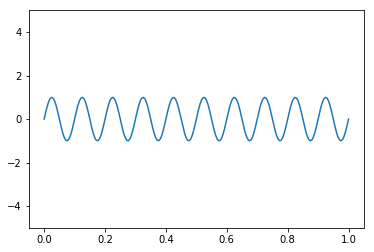

In [88]:
%matplotlib inline
slika()

Če funkcijo za izris slike pošljemo v funkcijo `interact`, slednja poskrbi za interaktivne gumbe s katerimi lahko spreminajmo parametre klicanja funkcije `slika`:

In [89]:
interact(slika);

A Jupyter Widget

Razpon parametov lahko tudi sami definiramo:

In [90]:
interact(slika, amplituda=(1, 5, 1), dušenje=(0, 1, 0.05), fr=(10, 100, 1), faza=(0, 2*np.pi, np.pi/180));

A Jupyter Widget

## Napredna uporaba

### Prikaz več funkcij

Poglejmo si preprost primer prikaza več funkcij:

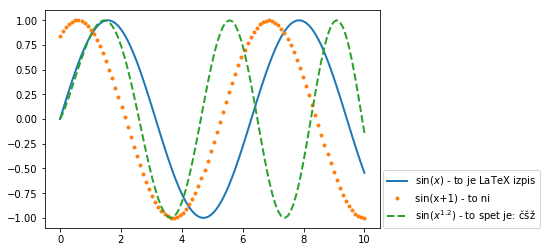

In [91]:
x = np.linspace(0, 10, 100)

y1 = np.sin(x)
y2 = np.sin(x+1)
y3 = np.sin(x**1.2)

plt.plot(x, y1, '-', label='$\sin(x)$ - to je LaTeX izpis', linewidth = 2);
plt.plot(x, y2, '.', label='sin(x+1) - to ni', linewidth = 2);
plt.plot(x, y3, '--', label='$\sin(x^{1.2})$ - to spet je: čšž', linewidth = 2);
plt.legend(loc=(1.01,0)); 
plt.savefig('data/prvi plot.pdf')

### Prikaz več slik

Več slik prikažemo s pomočjo metode `subplot`, ki definira mrežo in kam se bo izraisala naslednja krivulja.
```python
plt.subplot(2, 2, 1)
plt.plot(x, y1, 'r')
plt.subplot(2, 2, 2)
plt.plot(x, y2, 'g')
```
V primeru zgoraj `plt.subplot(2, 2, 1)` pomeni: mreža naj bo `2 x 2`, riši v sliko 1 (levo zgoraj). Nasledjič se kliče `plt.subplot(2, 2, 2)` kar pomeni mreža `2 x 2`, riši v sliko 2 (desno zgoraj) in tako naprej. Opazimo, da se indeks slik začne z 1; lahko bi rekli, da gre za nekonsistentnost z Pythonom, razlog pa je v tem, da ej `matplotlib` bil rojen v ideji, da bi uporabnikom Pythona uporabil čimbolj podoben način izrisa kakor so ga poznali v Matlabu.

Delujoči primer je:

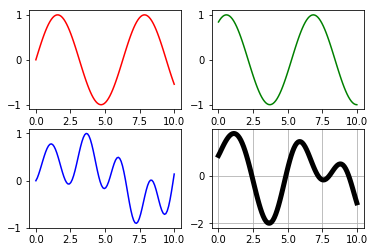

In [92]:
plt.subplot(2, 2, 1)
plt.plot(x, y1, 'r')
plt.subplot(2, 2, 2)
plt.plot(x, y2, 'g')
plt.subplot(2, 2, 3)
plt.plot(x, y2*y3, 'b')
plt.subplot(2, 2, 4)
plt.plot(x, y2+y3, 'k', linewidth=5);
plt.grid()

### Histogram

Generirajmo 10000 normalno porazdeljenih vzorcev in jih prikažimo v obliki histograma:

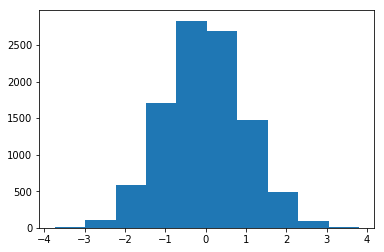

In [93]:
np.random.seed(0)
x = np.random.normal(size=10000)
plt.hist(x);

## Uporaba primerov iz ``matplotlib.org``

Primere iz [galerije](http://matplotlib.org/gallery.html) lahko uvozimo s pomočjo magične funkcije `%load`.

Poskusite:
* `%load http://matplotlib.org/mpl_examples/lines_bars_and_markers/fill_demo.py`
* `%load http://matplotlib.org/examples/widgets/slider_demo.py`

# Nekaj vprašanj za razmislek!

1. Naredite slovar lokalno nameščenih modulov (uporabite izpeljevanje slovarjev, ključ naj bo ime modula, vrednost naj bo verzija).
2. S pomočjo slovarja iz prejšnje točke čimbolj elegantno preverite ali so nameščeni sledeči moduli: ['numpy', 'scipy', 'matplotlib', 'pandas', 'pyjamas', 'openpyxl'].
3. Namestite poljubni modul iz https://pypi.python.org/pypi in ga preizkusite.
4. Pretvorite *navaden* Python seznam v ``numpy`` numerično polje. Preverite tip enega in drugega.
5. Raziščite funkcije ``np.ones``, ``np.zeros_like``, ``np.arange``, ``np.linspace`` (ali zadnja funkcija lahko vrne korak?).
6. Prikažite uporabo rezanja.
7. Prikažite razliko med vrstičnim in stolpičnim vektorjem. Prikažite tipične matematične operacije med vektorji in matrikami.
8. Ustvarite matriko ničel dimenzije 3 x 2 in drugi stolpec zapolnite z vektorjem enic.
9. Ustvarite enotsko matriko dimenzije 5 podatkovnega tipa ``complex``.
10. Ustvarite enotsko matriko dimenzije ``N`` in izračunajte vsoto poljubnga stolpca. Poskusite najti najhitrejši in najelegantnejši (vektoriziran) način in ga primerjajte s pristopom v zanki. Namig: np.sum().
11. V matriki iz prejšnje točke zamenjajte poljubna stolpca, nato še poljubni vrstici. Preverite hitrost vaše implementacije.
12. S pomočjo funkcije ``np.random.rand`` ustvarite dvorazsežno matriko poljubne dimenzije in najdite največjo in najmanjšo vrednost. Preverite možnost ``axis`` v funkciji ``np.max`` ali ``np.min``.
13. V matriki iz prejšnje točke najdite indeks, kjer se nahaja največja vrednost.
14. Na primeru preprostega diagrama prikažite razliko med *inline* in *interaktivno* uporabo knjižnice ``matplotlib``
15. Na primeru preprostega diagrama prikažite uporabo vsaj 5 različnih tipov črte in 5 različnih barv.
16. Raziščite primere http://matplotlib.org/gallery.html. Za primer si podrobneje poglejte enega od zgledov na temo zaznamb *annotation*. Izbrani primer namestite na vaš računalnik.
17. Na primeru preprostega diagrama prikažite uporabo zaznamb.
18. Dodatno: Naredite preprosto animacijo.
19. Dodatno: Izrišite več krogov naključne lege in velikosti ter poljubne barve. Ob kliku se krogom naj spremeni barva.

# Dodatno

## `numba`

Paket `numba` se v zadnjem obdobju zelo razvija in lahko numerično izvajanje še dodatno pohitri (tudi v povezavi grafiučnimi karticami oz GPU procesorji). 

Za zgled tukaj uporabimo `jit` ([just-in-time compilation](http://numba.pydata.org/numba-doc/dev/reference/jit-compilation.html)) iz paketa `numba`:

In [94]:
from numba import jit

`jit` uporabimo kot [dekorator](https://docs.python.org/3/glossary.html#term-decorator) funkcije, ki jo želimo pohitriti:

In [95]:
@jit
def skalarni_produkt(a, b):
    c = 0
    for i in range(N):
        c += a[i] * b[i]
    return c

Sedaj definirajmo vektorja:

In [96]:
N = 1000
a = np.arange(N)
b = np.arange(N)

In preverimo hitrost `numpy` skalarnega produkta:

In [97]:
%%timeit -n1000
a @ b

2.5 µs ± 666 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In `numba` pohitrene verzije, prvi klic izvedemo, da se izvede kompilacija, potem merimo čas:

In [98]:
skalarni_produkt(a, b)

332833500

In [99]:
%%timeit -n1000
skalarni_produkt(a, b)

924 ns ± 142 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Vidimo, da smo še izboljšali hitrost!

## `matplotlib`: animacije, povratni klic, XKCD stil

Z `matplotlib` lahko pripravimo tudi **animacije**. Dva primera lahko najdete tukaj:
* [Preprosta animacija](./moduli/matplotlib_animacija.py),
* [Dvojno nihalo](./moduli/animacija_dvojno_nihalo.py).

Več v [dokumentaciji](https://matplotlib.org/api/animation_api.html#animation).

Slika s **povratnim klicem** (ang. *call back*):
* [Risanje črte](./moduli/matplotlib_klik.py).

Pripravite lahko tudi *na roko* narisane slike (**XKCD stil**):
* [XKCD stil](./moduli/xkcd_stil.py).

## Za najbolj zagrete

1. Naučite se kaj novega na [chrisalbon.com](http://chrisalbon.com/)